

# 1- CONTEXTE

Le but est d'effectuer un clustering des k-moyens sur une base de donnees assez populaire (iris data) afin de grouper les fleurs d'iris similaire.


#2- COLLECTE DES DONNEES

In [3]:
from sklearn.datasets import load_iris
import pandas as pd
iris = load_iris()

In [4]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [5]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
df.isnull().sum()

,0
sepal length (cm),0
sepal width (cm),0
petal length (cm),0
petal width (cm),0


#3- PRETRAITEMENT DES DONNEES

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler_df = scaler.fit_transform(df)

#4 ANALYSE UNIVARIEE, BIVARIEE ET SELECTION DES VARIABLES

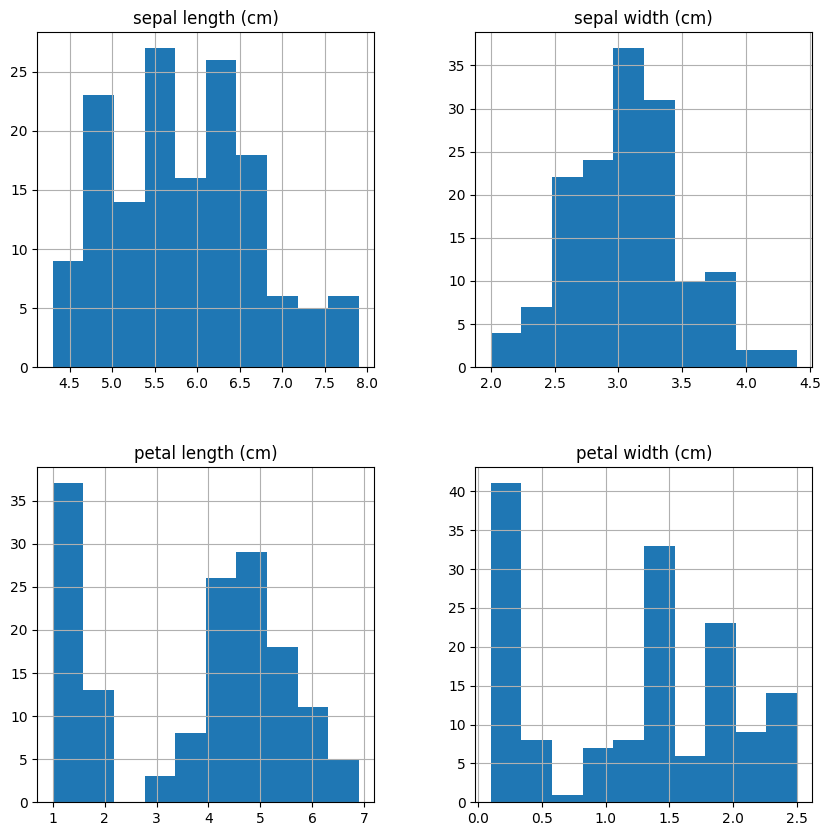

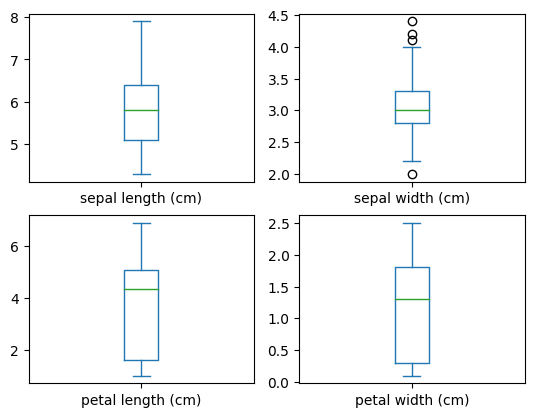

In [8]:
import matplotlib.pyplot as plt

# Histogramme
df.hist(figsize=(10,10))
plt.show()

# Boxplot
df.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

<Axes: >

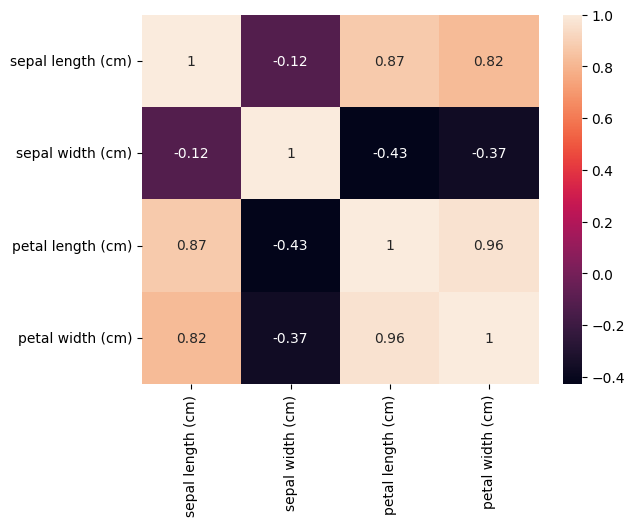

In [11]:
import seaborn as sns

# Matrice de correlation
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')
sns.heatmap(corr, annot=True)

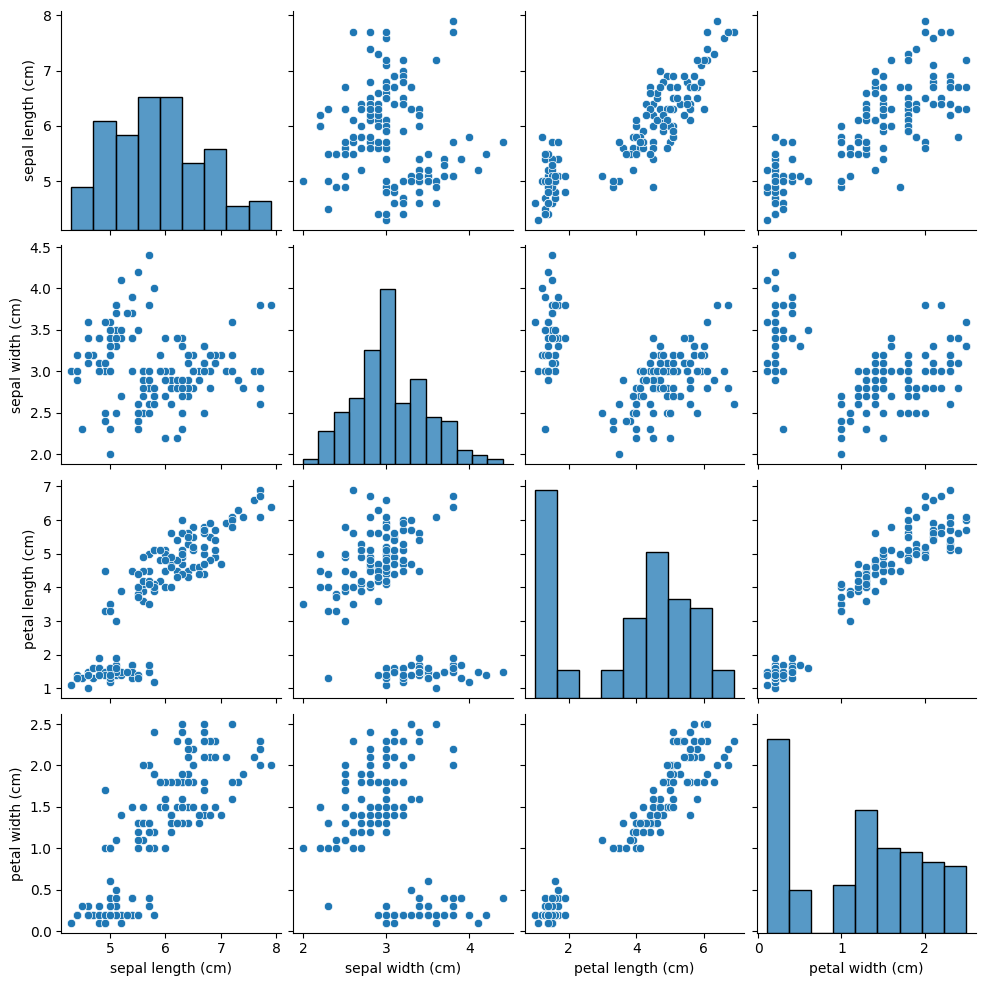

In [12]:
sns.pairplot(df)

#5- ANALYSE DU NOMBRE DE CLUSTERS

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

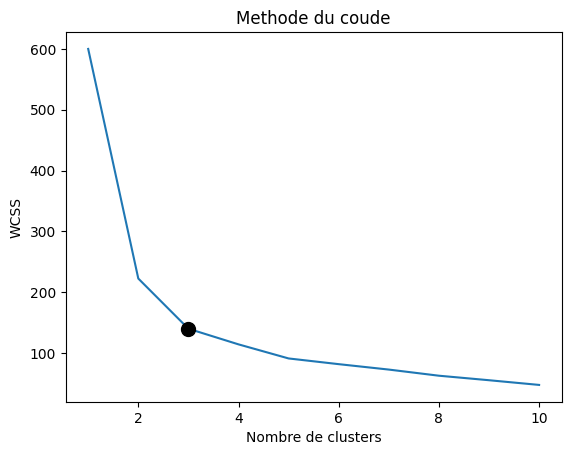

In [48]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Determination du nombre de clusters
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaler_df)
    wcss.append(kmeans.inertia_)

# Graphique de l'inertie
plt.plot(range(1,11), wcss)
plt.title('Methode du coude')
plt.xlabel('Nombre de clusters')
plt.ylabel('WCSS')

#Ajoutons un point pour materialiser la zone de courbure
plt.scatter(3, wcss[2], color='black', s=100, zorder=5)
plt.show()

#5- IMPLEMENTATION DU MODELE

In [25]:
# Conception du Modele
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(scaler_df)

# Ajout des cluster au dataframe
df['cluster'] = y_kmeans
df.head(10)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
5,5.4,3.9,1.7,0.4,1
6,4.6,3.4,1.4,0.3,1
7,5.0,3.4,1.5,0.2,1
8,4.4,2.9,1.4,0.2,1
9,4.9,3.1,1.5,0.1,1


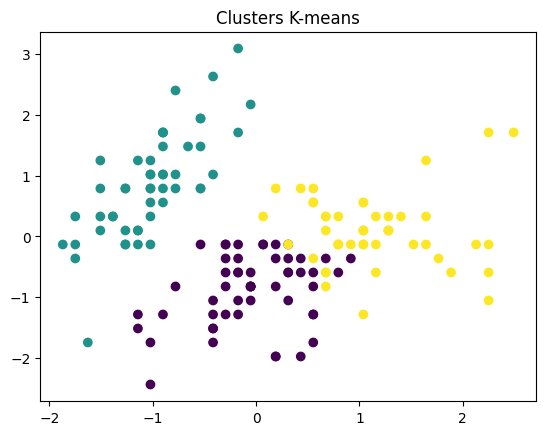

In [54]:
# Visualisation des clusters
plt.scatter(scaler_df[:,0], scaler_df[:,1], c=y_kmeans, cmap='viridis')
plt.title('Clusters K-means')
plt.show()

#6- EVALUATION DU MODELE

In [63]:
from sklearn.metrics import silhouette_score, davies_bouldin_score
print("Coefficient de silhouette", silhouette_score(scaler_df, y_kmeans))
print("Davies-Bouldin score", davies_bouldin_score(scaler_df, y_kmeans))

Coefficient de silhouette 0.45994823920518635
Davies-Bouldin score 0.8335949464754338


In [62]:
print(df.groupby('cluster').mean())

         sepal length (cm)  sepal width (cm)  petal length (cm)  \
cluster                                                           
0                 5.801887          2.673585           4.369811   
1                 5.006000          3.428000           1.462000   
2                 6.780851          3.095745           5.510638   

         petal width (cm)  
cluster                    
0                1.413208  
1                0.246000  
2                1.972340  
